# Activity 1 : Linear Model

In [94]:
data <-read.csv("NHLTop100.csv",header=T)
head(data)

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


## a) General Lm Model

In [95]:
model <- lm(formula= A ~ G, data= data)
model


Call:
lm(formula = A ~ G, data = data)

Coefficients:
(Intercept)            G  
   494.5135       0.5202  


In [96]:
summary(model)


Call:
lm(formula = A ~ G, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


<p style = 'color:blue'> <font size='4'> Summary() function displays the required R-squared and p values of the fit as shown above. </font> </p>

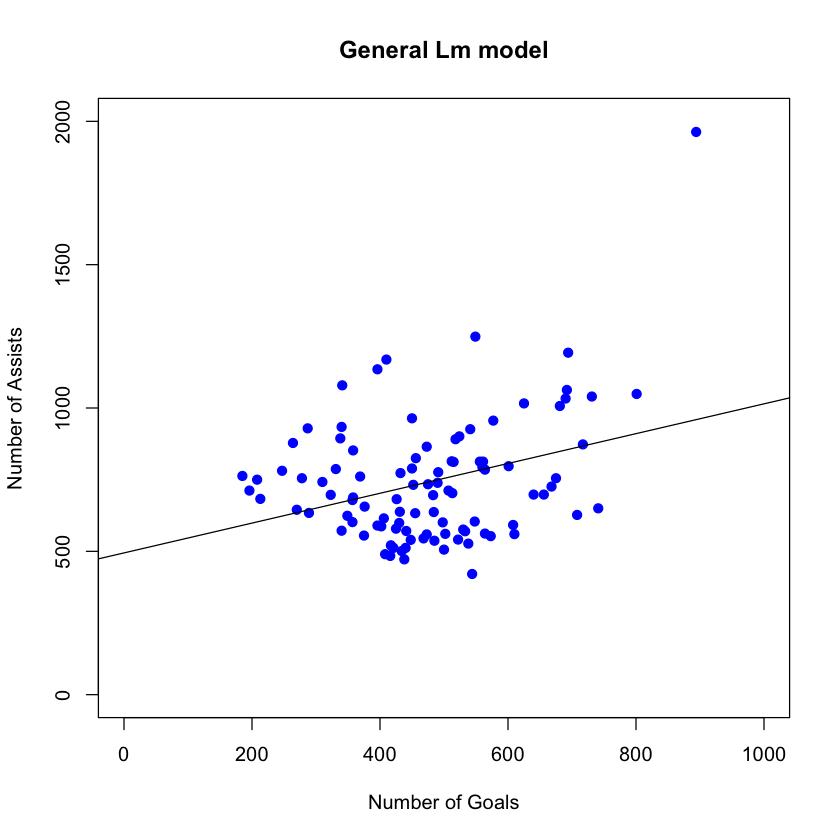

In [97]:
coefs <- coef(model)
plot(data$G,data$A,pch=19,col='blue',xlab='Number of Goals',ylab='Number of Assists',main='General Lm model',  xlim=c(0,1000), ylim=c(0,2000)) #+ xlim(0,1000)+ ylim(0,2000)
abline(coefs[1],coefs[2])

<p style='color:purple'> <font size='4'>Multiple R-squared:  0.1082, Adjusted R-squared:  0.09913,  p-value: 0.0008317 </font>  </p> 

## b) Line is forced through Wayne Gretzky

In [98]:
Y <- data$A
X <- data$G
model_wayne <- lm(formula = I(Y-1963) ~ I(X-894) + 0  , data= data) 
model_wayne


Call:
lm(formula = I(Y - 1963) ~ I(X - 894) + 0, data = data)

Coefficients:
I(X - 894)  
     2.685  


<p style='color:blue'> <font size="4"> + 0 has been added in above model. Only by doing so, the regression line fits the line.For more explanation, see the appendix part at the bottom of this notebook</font></p>

In [99]:
summary(model_wayne)


Call:
lm(formula = I(Y - 1963) ~ I(X - 894) + 0, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(X - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


In [100]:
calculate_intercept <- function(x,y,model){ I(y - coef(model)[1]*x) }
intercept <- calculate_intercept(894,1963,model_wayne)
intercept

I(X - 894) 
 -437.0882 

<p style='color:blue'> <font size="4">The line is now forced through Wayne Gretzky. This is done by using the slope and calculating the intercept </font></p>
<p style='color:green'> <font size="4"> Slope = 2.685 , intercept is found by y=mx+c where m = 2.685 , x=894,y=1963 </font></p>

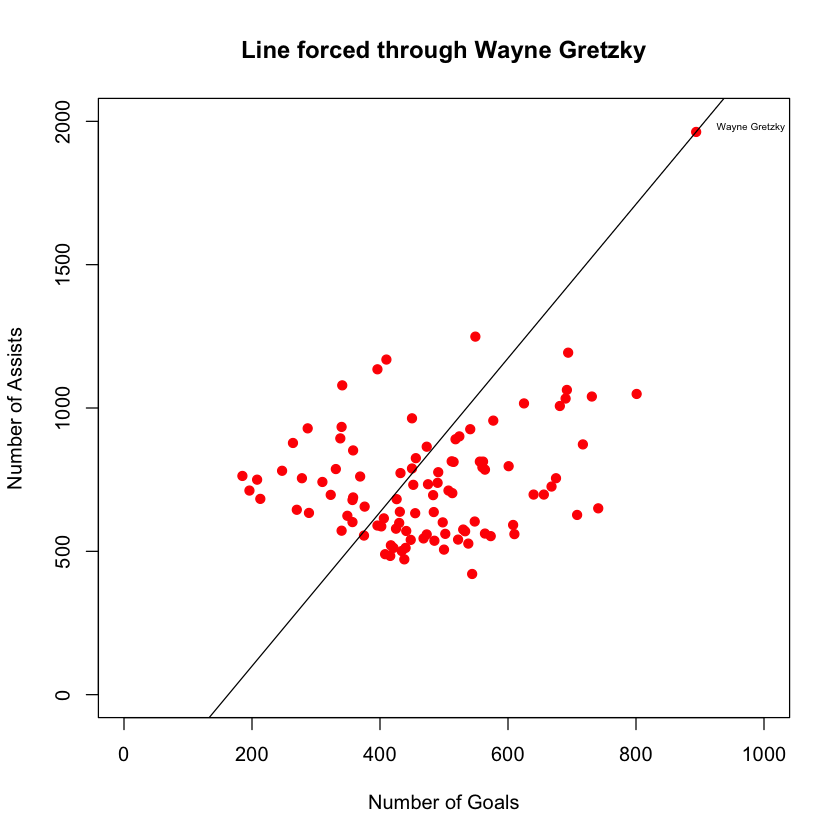

In [101]:
coefs <- coef(model_wayne)
plot(data$G,data$A,pch=19,col='red',xlab='Number of Goals',ylab='Number of Assists',main='Line forced through Wayne Gretzky',  xlim=c(0,1000), ylim=c(0,2000))
abline(-437.39,2.685)
textxy(894,1963,'Wayne Gretzky')

<p style='color:purple'> <font size="4">Multiple R-squared:  0.9091,Adjusted R-squared:  0.9082, p-value: less than  2.2e-16 </font> </p> 

## c) Line is forced through Patrick Kane

<p style="color:blue"><font size='4'> The values of G and A for Patrick kane has been taken from https://www.nhl.com/player/patrick-kane-8474141 and added to the csv file </font></p>
<p style="color:green"><font size='4'> General model with patrick kane is as follows </font></p>


In [102]:
patrick_data <-read.csv("NHLTop100_patrick.csv",header=T)
tail(patrick_data)

,Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots
96,96,Gary Roberts,,L,1986-1987,2008-2009,1224,438,472,910,229,2560,109,13,52,11,5,2374
97,97,Scott Stevens,,D,1982-1983,2003-2004,1635,196,712,908,377,2785,75,5,34,0,2,3240
98,98,Tony Amonte,,R,1990-1991,2006-2007,1174,416,484,900,96,752,108,23,58,7,6,3260
99,99,Ray Ferraro,,C,1984-1985,2001-2002,1258,408,490,898,-104,1288,130,0,45,11,6,2164
100,100,Brad Park,,D,1968-1969,1984-1985,1113,213,683,896,358,1429,93,5,28,NA,NA,2820
101,101,Patrick Kane,,,,,NA,285,465,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [103]:
model2 <- lm(formula= A ~ G, data= patrick_data)
model2  # general lm model for dataset with patrick kane entry


Call:
lm(formula = A ~ G, data = patrick_data)

Coefficients:
(Intercept)            G  
   484.4871       0.5377  


In [104]:
summary(model2)


Call:
lm(formula = A ~ G, data = patrick_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.98 -172.72   -8.94  126.20  997.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 484.4871    73.5891   6.584 2.22e-09 ***
G             0.5377     0.1492   3.603 0.000493 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.7 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.107 
F-statistic: 12.98 on 1 and 99 DF,  p-value: 0.0004934


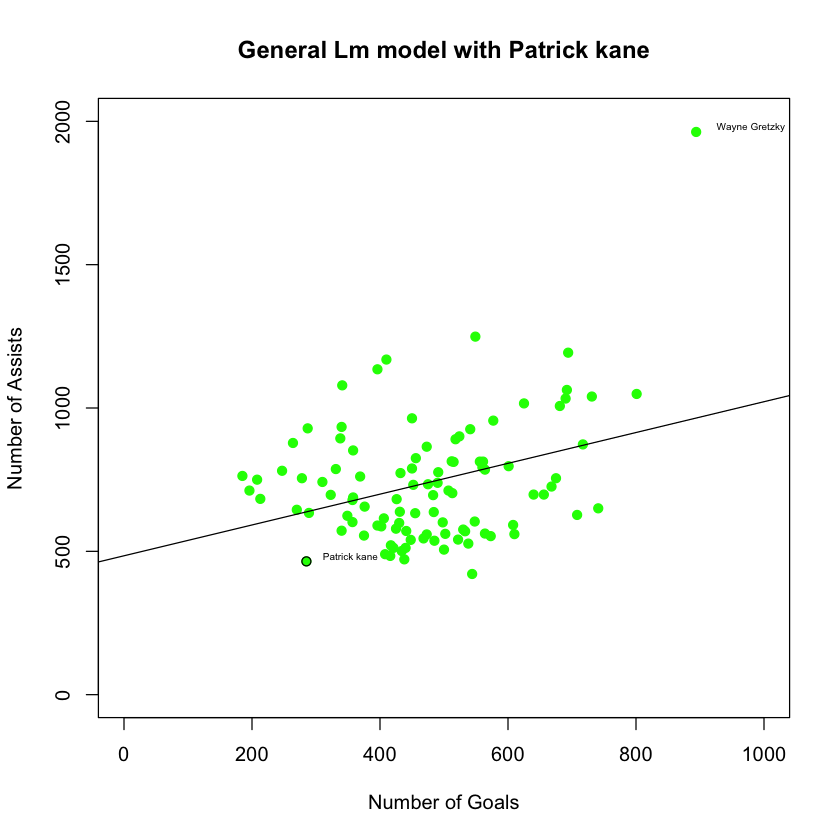

In [105]:
#install.packages('calibrate')
library('calibrate')
coefs <- coef(model2)
plot(patrick_data$G,patrick_data$A,pch=19,col='green',xlab='Number of Goals',ylab='Number of Assists',main='General Lm model with Patrick kane',  xlim=c(0,1000), ylim=c(0,2000)) 
abline(coefs[1],coefs[2])
points(285,465)
textxy(894,1963,'Wayne Gretzky')
textxy(285,465,'Patrick kane')

<p style='color:purple'> <font size="4"> Multiple R-squared:  0.116, Adjusted R-squared:  0.107, p-value: 0.0004934 </font></p>

### Force the line through patrick point

In [106]:
Y <- patrick_data$A
X <- patrick_data$G
model_patrick <- lm(formula = I(Y-465) ~ I(X-285) + 0  , data= patrick_data)
model_patrick
summary(model_patrick)


Call:
lm(formula = I(Y - 465) ~ I(X - 285) + 0, data = patrick_data)

Coefficients:
I(X - 285)  
     1.135  



Call:
lm(formula = I(Y - 465) ~ I(X - 285) + 0, data = patrick_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.85 -114.55   40.53  165.99  807.05 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(X - 285)   1.1346     0.0979   11.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 229.8 on 100 degrees of freedom
Multiple R-squared:  0.5732,	Adjusted R-squared:  0.5689 
F-statistic: 134.3 on 1 and 100 DF,  p-value: < 2.2e-16


In [107]:
pat_intercept <- calculate_intercept(285,465,model_patrick)
pat_intercept

I(X - 285) 
  141.6491 

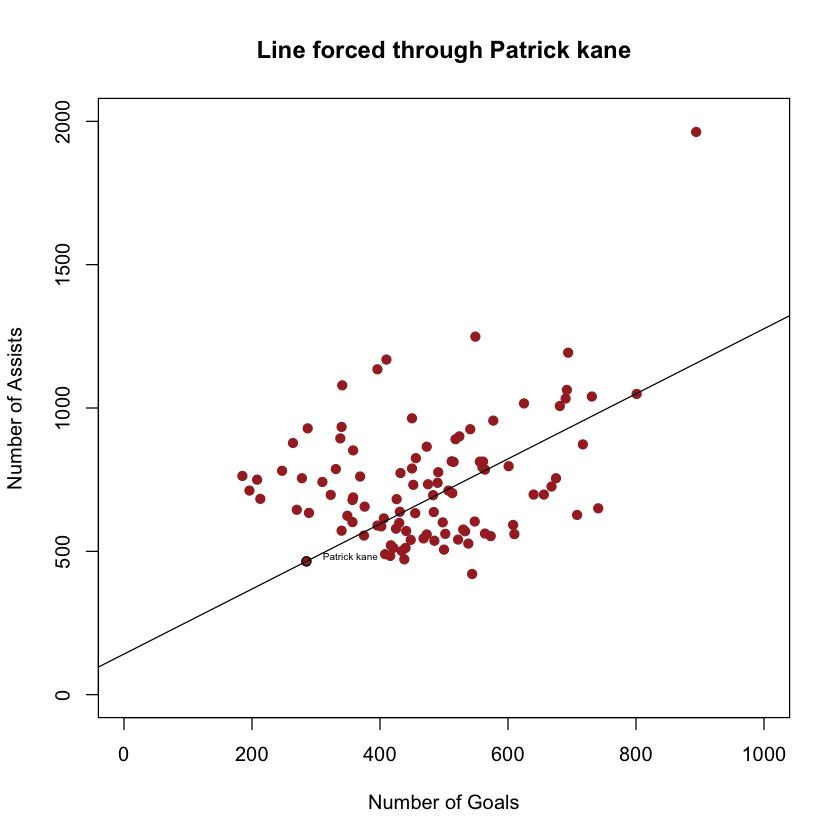

In [108]:
coefs <- coef(model_patrick)
plot(patrick_data$G,patrick_data$A,pch=19,col='brown',xlab='Number of Goals',ylab='Number of Assists',main='Line forced through Patrick kane',  xlim=c(0,1000), ylim=c(0,2000))
abline(141.6491,1.135)
points(285,465)
textxy(285,465,'Patrick kane')

<p style='color:purple'> <font size="4"> Multiple R-squared:   0.5732, Adjusted R-squared:  0.5689, p-value: less than 2.2e-16 </font></p>

## d) Make all models go through origin

In [109]:
model_origin <- lm(formula= I(A) ~ I(G) + 0, data= data)
model_origin
summary(model_origin)


Call:
lm(formula = I(A) ~ I(G) + 0, data = data)

Coefficients:
I(G)  
1.48  



Call:
lm(formula = I(A) ~ I(G) + 0, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
I(G)  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16


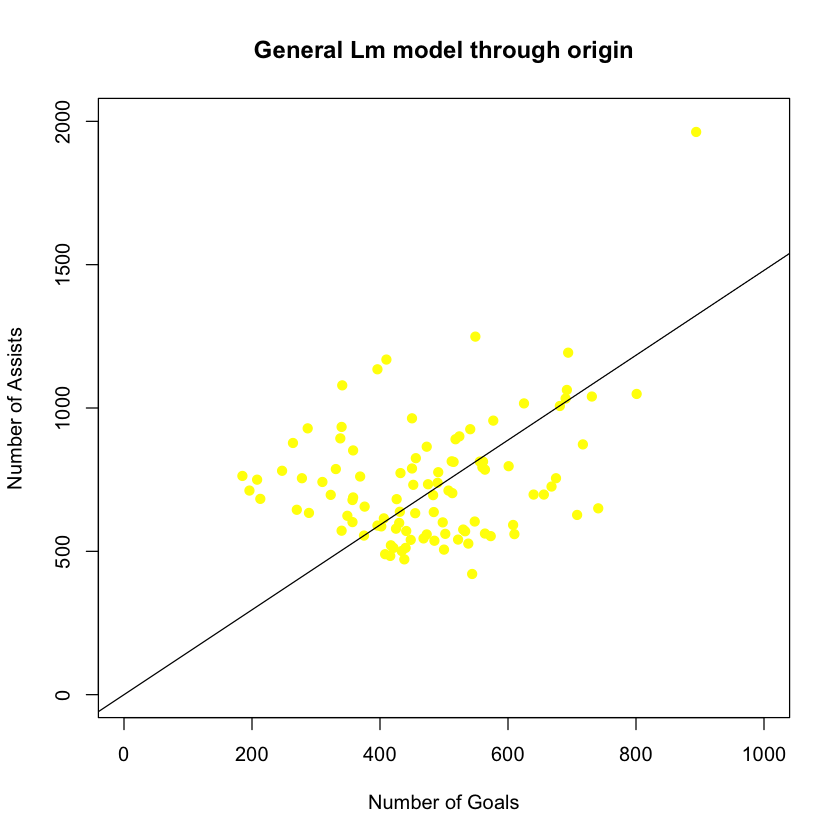

In [110]:
coefs <- coef(model_origin)
plot(data$G,data$A,pch=19,col='yellow',xlab='Number of Goals',ylab='Number of Assists',main='General Lm model through origin',  xlim=c(0,1000), ylim=c(0,2000)) #+ xlim(0,1000)+ ylim(0,2000)
abline(0,coefs[1])

<p style='color:purple'> <font size='4'>Multiple R-squared:  0.8982, Adjusted R-squared:  0.8972,  p-value: less than 2.2e-16 </font>  </p> 

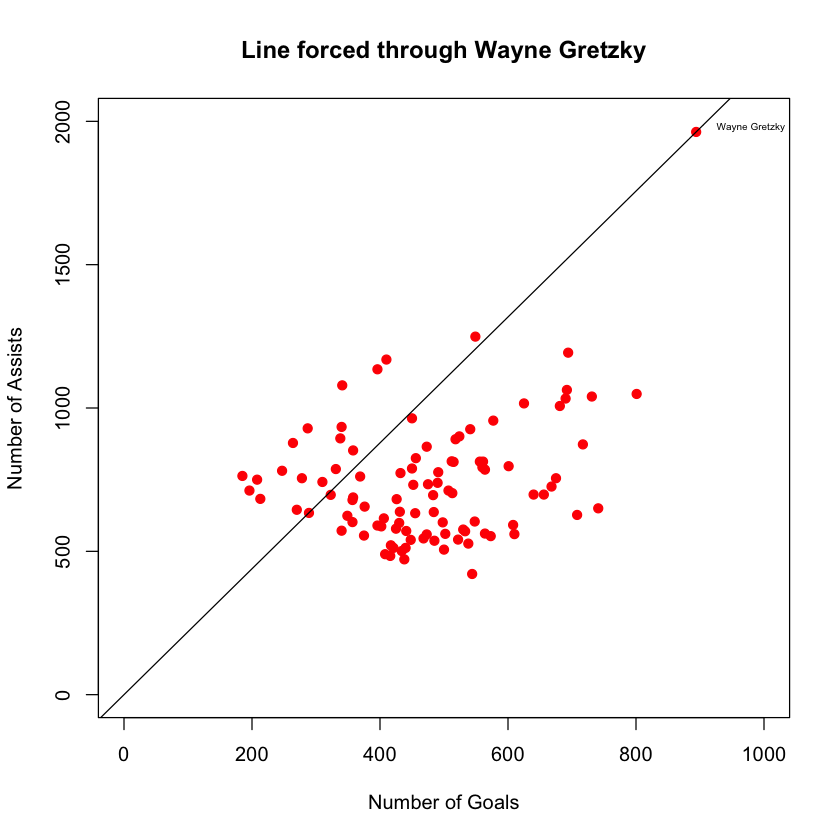

In [111]:
plot(data$G,data$A,pch=19,col='red',xlab='Number of Goals',ylab='Number of Assists',main='Line forced through Wayne Gretzky',  xlim=c(0,1000), ylim=c(0,2000))
abline(0,2.1957494)
textxy(894,1963,'Wayne Gretzky')

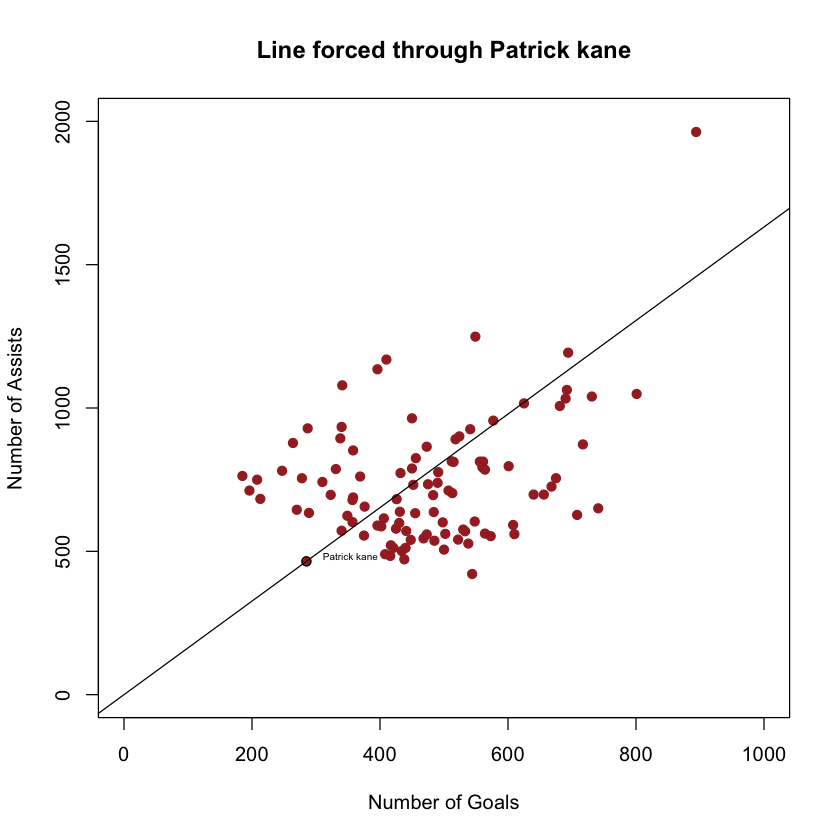

In [112]:
plot(patrick_data$G,patrick_data$A,pch=19,col='brown',xlab='Number of Goals',ylab='Number of Assists',main='Line forced through Patrick kane',  xlim=c(0,1000), ylim=c(0,2000))
abline(0, 1.631578)
points(285,465)
textxy(285,465,'Patrick kane')

# Appendix : 

In [113]:
Y <- data$A
X <- data$G
model_wayne_wr <- lm(formula = I(Y-1963) ~ I(X-894)  , data= data) 
model_wayne_wr


Call:
lm(formula = I(Y - 1963) ~ I(X - 894), data = data)

Coefficients:
(Intercept)   I(X - 894)  
 -1003.4220       0.5202  


In [114]:
summary(model_wayne_wr)


Call:
lm(formula = I(Y - 1963) ~ I(X - 894), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1003.4220    66.4463 -15.101  < 2e-16 ***
I(X - 894)      0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


<p style='color:orange'> <font size='4'> It can be observed that the R-squared and p values do not alter even after changing the model (compare with part a)</font></p>

In [115]:
calculate_intercept <- function(x,y,model){ I(y - coef(model)[2]*x) }
intercept <- calculate_intercept(894,1963,model_wayne_wr)
intercept

I(X - 894) 
  1497.936 

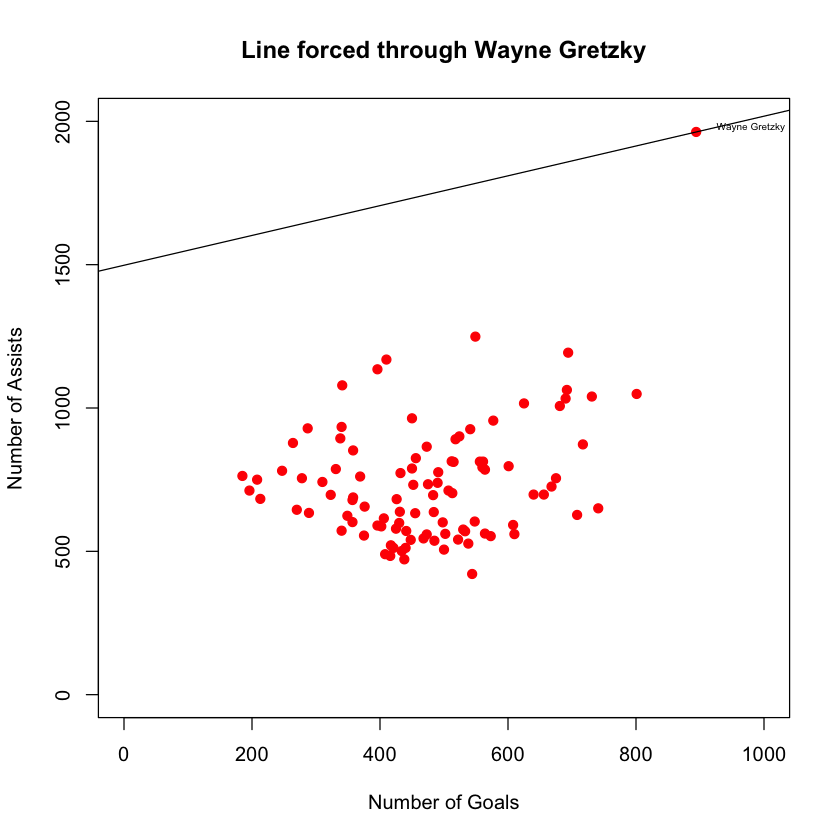

In [116]:
coefs <- coef(model_wayne_wr)
plot(data$G,data$A,pch=19,col='red',xlab='Number of Goals',ylab='Number of Assists',main='Line forced through Wayne Gretzky',  xlim=c(0,1000), ylim=c(0,2000))
abline(1497.936,0.5202)
textxy(894,1963,'Wayne Gretzky')

<p style='color:orange'> <font size='4'> It can be observed that the regression line goes through the wayne gretzky point and it doesnt seem to fit the model.That is why the part b) has been done as shown above</font></p>

In [117]:
p_values <- as.data.frame(c(' 0.0008317','less than 2.2e-16','0.0004934','less than 2.2e-16','less than 2.2e-16'))
p_values <- setNames(p_values,'p_values')
r2_values <- as.data.frame(c('0.1082','0.9091','0.116','0.5732','0.8982'))
r2_values <- setNames(r2_values,'r2_values')

In [118]:
type <- as.data.frame(c('general lm model','line through wayne','general lm model with patrick','line through patrick','general model through origin'))
type <- setNames(type,'type')

In [120]:
final_table <- cbind(type,r2_values,p_values)
final_table

type,r2_values,p_values
general lm model,0.1082,0.0008317
line through wayne,0.9091,less than 2.2e-16
general lm model with patrick,0.116,0.0004934
line through patrick,0.5732,less than 2.2e-16
general model through origin,0.8982,less than 2.2e-16


<p style='color:brown'><font size='3'>It can be observed that p_values are good(as p is less than 0.05 for high significance of prediction) for all models. The model - 'line forced through wayne' seems to be the best model (for good fit, r2 value is close to 1).</font></p>